In [457]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline

In [458]:
adidas_path = 'Resources/Adidas US Sales Datasets.xlsx'
adidas_df = pd.read_excel(adidas_path,
                          index_col='Unnamed: 3',
                          parse_dates=True,
                          date_format='dateutil')

In [459]:
adidas_df = adidas_df.rename_axis('Invoice Date')
adidas_df.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)
adidas_df = adidas_df.rename(
    columns={
        'Unnamed: 1': 'Retailer',
        'Unnamed: 5': 'State',
        'Unnamed: 7': 'Product',
        'Unnamed: 10': 'Total Sales',
    }
)
adidas_df.dropna(inplace=True)

In [460]:
adidas_df = adidas_df.reset_index()

adidas_df.drop(0, axis=0, inplace=True)

adidas_df['Date'] = pd.to_datetime(adidas_df['Invoice Date'])

adidas_df = adidas_df.set_index('Date')

adidas_df.drop('Invoice Date', axis=1, inplace=True)


adidas_df = adidas_df.sort_index()

display(adidas_df.head(10))
display(adidas_df.tail(10))

,Retailer,State,Product,Total Sales
Date,,,,
2020-01-01,Foot Locker,New York,Men's Street Footwear,600000
2020-01-01,Foot Locker,Pennsylvania,Women's Apparel,206250
2020-01-01,Foot Locker,Pennsylvania,Women's Apparel,4399
2020-01-01,Foot Locker,New York,Men's Street Footwear,15792
2020-01-01,Foot Locker,New York,Men's Street Footwear,13056
2020-01-01,Foot Locker,Pennsylvania,Women's Apparel,5644
2020-01-02,West Gear,Pennsylvania,Men's Street Footwear,3904
2020-01-02,West Gear,Pennsylvania,Men's Street Footwear,4266
2020-01-02,Foot Locker,New York,Men's Athletic Footwear,11520


,Retailer,State,Product,Total Sales
Date,,,,
2021-12-30,Foot Locker,Pennsylvania,Women's Athletic Footwear,105000.0
2021-12-30,Foot Locker,Pennsylvania,Women's Athletic Footwear,3021
2021-12-30,Amazon,Maine,Women's Athletic Footwear,1512
2021-12-30,Foot Locker,Pennsylvania,Women's Athletic Footwear,2120
2021-12-30,Amazon,Maine,Women's Athletic Footwear,56250
2021-12-31,Foot Locker,Pennsylvania,Men's Apparel,122500
2021-12-31,Foot Locker,Pennsylvania,Men's Apparel,2961
2021-12-31,Foot Locker,Pennsylvania,Men's Apparel,2576
2021-12-31,Amazon,Maine,Men's Apparel,1872


In [461]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9648 entries, 2020-01-01 to 2021-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Retailer     9648 non-null   object
 1   State        9648 non-null   object
 2   Product      9648 non-null   object
 3   Total Sales  9648 non-null   object
dtypes: object(4)
memory usage: 376.9+ KB


In [462]:
adidas_monthly_df = pd.pivot_table(adidas_df,
                                   index=['State', 'Date'],
                                   values='Total Sales',
                                   aggfunc='sum')

display(adidas_monthly_df.head(10))
display(adidas_monthly_df.tail(10))

Total Sales
State   Date                  
Alabama 2021-08-05      136790
        2021-08-06      174314
        2021-08-07      163290
        2021-08-08      220734
        2021-08-09      156382
        2021-08-10      137098
        2021-08-11      105049
        2021-08-12      165546
        2021-08-13      196526
        2021-08-14      262976

Total Sales
State   Date                  
Wyoming 2021-03-10   1321941.0
        2021-04-11   1283155.0
        2021-05-10   1635913.0
        2021-06-12   1755981.0
        2021-07-10   1832450.0
        2021-08-11   1804286.0
        2021-09-10   1701968.0
        2021-10-12   1799297.0
        2021-11-11   1783018.0
        2021-12-10   1867314.0

In [463]:
adidas_monthly_sales = adidas_df['Total Sales'].groupby(by=[adidas_df.index.year, adidas_df.index.month]).sum()

print(adidas_monthly_sales)

Date  Date
2020  1       16253746.0
      2       14997988.0
      3       17660577.0
      4       24607006.0
      5       16918014.0
      6        8829819.0
      7       17146013.0
      8       19877980.0
      9       18304436.0
      10      10836269.0
      11       8622300.0
      12       8026527.0
2021  1       55225396.0
      2       46102165.0
      3       39148532.0
      4       47732964.0
      5       63589681.0
      6       65917553.0
      7       78334681.0
      8       72288221.0
      9       59357023.0
      10      53074764.0
      11      59235040.0
      12      77815430.0
Name: Total Sales, dtype: object


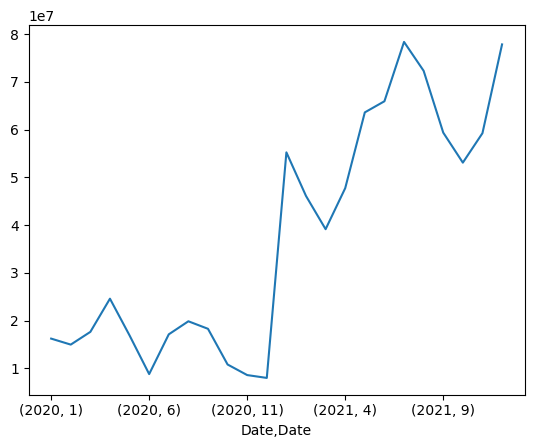

In [464]:
adidas_monthly_sales.plot()
pyplot.show()

In [465]:
adidas_monthly_sales_by_state = adidas_df.groupby(['State', adidas_df.index.year, adidas_df.index.month])['Total Sales'].sum()



print(adidas_monthly_sales_by_state)

State    Date  Date
Alabama  2021  8       4274720.0
               9       9020723.0
               10      4337981.0
Alaska   2021  1       1040725.0
               2       1550608.0
                         ...    
Wyoming  2021  8       1804286.0
               9       1701968.0
               10      1799297.0
               11      1783018.0
               12      1867314.0
Name: Total Sales, Length: 509, dtype: object


In [466]:
adidas_monthly_sales_by_state.info()

<class 'pandas.core.series.Series'>
MultiIndex: 509 entries, ('Alabama', 2021, 8) to ('Wyoming', 2021, 12)
Series name: Total Sales
Non-Null Count  Dtype 
--------------  ----- 
509 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [467]:
display(adidas_monthly_sales_by_state.head(20))
display(adidas_monthly_sales_by_state.tail(20))

State    Date  Date
Alabama  2021  8       4274720.0
               9       9020723.0
               10      4337981.0
Alaska   2021  1       1040725.0
               2       1550608.0
               3        911790.0
               4        850038.0
               5       1328865.0
               6       1556106.0
               7       1654007.0
               8       1469413.0
               9       1138235.0
               10      1064179.0
               11      1460411.0
               12       728726.0
Arizona  2021  1       1145508.0
               2        906789.0
               3        938733.0
               4       1096384.0
               5       1272985.0
Name: Total Sales, dtype: object

State      Date  Date
Wisconsin  2021  5        738617.0
                 6        632738.0
                 7        898153.0
                 8        870026.0
                 9        445257.0
                 10       529973.0
                 11       783505.0
                 12      1187274.0
Wyoming    2021  1        710818.0
                 2       1081376.0
                 3       1321941.0
                 4       1283155.0
                 5       1635913.0
                 6       1755981.0
                 7       1832450.0
                 8       1804286.0
                 9       1701968.0
                 10      1799297.0
                 11      1783018.0
                 12      1867314.0
Name: Total Sales, dtype: object

In [468]:
monthly_temps_path = 'Resources/average_monthly_temperature_by_state_1950-2022.csv'
monthly_temps_df = pd.read_csv(monthly_temps_path,
                               index_col='year')

In [469]:
monthly_temps_df = monthly_temps_df.loc['2020':'2021']

monthly_temps_df = monthly_temps_df.rename_axis('Year')

monthly_temps_df.drop(['Unnamed: 0', 'monthly_mean_from_1901_to_2000', 'centroid_lon', 'centroid_lat'], axis=1, inplace=True)

monthly_temps_df = monthly_temps_df.rename(
    columns={
        'month': 'Month',
        'state': 'State',
        'average_temp': 'Average Temp'
    }
)

In [470]:
monthly_temps_df = monthly_temps_df.reset_index()

In [471]:
monthly_temps_df['Date'] = pd.to_datetime(monthly_temps_df['Year'].astype(str) + '-' + monthly_temps_df['Month'].astype(str).str.zfill(2))

monthly_temps_df['Date'] = monthly_temps_df['Date'].dt.to_period('M')

monthly_temps_df = monthly_temps_df.set_index('Date')

monthly_temps_df.drop(['Year', 'Month'], axis=1, inplace=True)


In [472]:
monthly_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1152 entries, 2020-01 to 2021-12
Freq: M
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1152 non-null   object 
 1   Average Temp  1152 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.0+ KB


In [473]:

display(monthly_temps_df.head(10))
display(monthly_temps_df.tail(10))

,State,Average Temp
Date,,
2020-01,Alabama,50.4
2020-01,Arizona,43.0
2020-01,Arkansas,44.8
2020-01,California,44.8
2020-01,Colorado,27.8
2020-01,Connecticut,32.4
2020-01,Delaware,40.1
2020-01,Florida,62.8
2020-01,Georgia,51.8


,State,Average Temp
Date,,
2021-12,South Dakota,31.4
2021-12,Tennessee,48.0
2021-12,Texas,58.2
2021-12,Utah,36.8
2021-12,Vermont,31.2
2021-12,Virginia,45.2
2021-12,Washington,34.7
2021-12,West Virginia,41.8
2021-12,Wisconsin,29.3


In [474]:
monthly_temps_by_state = monthly_temps_df.groupby(['State', monthly_temps_df.index.year, monthly_temps_df.index.month])['Average Temp'].sum()

print(monthly_temps_by_state)

State    Date  Date
Alabama  2020  1       50.4
               2       50.2
               3       57.2
               4       62.8
               5       65.4
                       ... 
Wyoming  2021  8       67.1
               9       61.1
               10      51.0
               11      40.2
               12      31.3
Name: Average Temp, Length: 1152, dtype: float64


In [475]:
adidas_temps = pd.concat([monthly_temps_by_state, adidas_monthly_sales_by_state], axis=1).dropna()

display(adidas_temps.head(10))
display(adidas_temps.tail(10))

Average Temp Total Sales
State   Date Date                          
Alabama 2021 8             79.7   4274720.0
             9             76.9   9020723.0
             10            70.6   4337981.0
Arizona 2021 1             42.3   1145508.0
             2             44.6    906789.0
             3             48.0    938733.0
             4             55.4   1096384.0
             5             64.6   1272985.0
             6             74.4   1572398.0
             7             81.0   1687303.0

Average Temp Total Sales
State   Date Date                          
Wyoming 2021 3             24.8   1321941.0
             4             35.0   1283155.0
             5             43.4   1635913.0
             6             56.8   1755981.0
             7             67.4   1832450.0
             8             67.1   1804286.0
             9             61.1   1701968.0
             10            51.0   1799297.0
             11            40.2   1783018.0
             12            31.3   1867314.0

In [476]:
adidas_temps.index

MultiIndex([('Alabama', 2021,  8),
            ('Alabama', 2021,  9),
            ('Alabama', 2021, 10),
            ('Arizona', 2021,  1),
            ('Arizona', 2021,  2),
            ('Arizona', 2021,  3),
            ('Arizona', 2021,  4),
            ('Arizona', 2021,  5),
            ('Arizona', 2021,  6),
            ('Arizona', 2021,  7),
            ...
            ('Wyoming', 2021,  3),
            ('Wyoming', 2021,  4),
            ('Wyoming', 2021,  5),
            ('Wyoming', 2021,  6),
            ('Wyoming', 2021,  7),
            ('Wyoming', 2021,  8),
            ('Wyoming', 2021,  9),
            ('Wyoming', 2021, 10),
            ('Wyoming', 2021, 11),
            ('Wyoming', 2021, 12)],
           names=['State', 'Date', 'Date'], length=485)

In [477]:
adidas_temps.index.names = ['State', 'Year', 'Month']

display(adidas_temps.head(10))
display(adidas_temps.tail(10))

Average Temp Total Sales
State   Year Month                          
Alabama 2021 8              79.7   4274720.0
             9              76.9   9020723.0
             10             70.6   4337981.0
Arizona 2021 1              42.3   1145508.0
             2              44.6    906789.0
             3              48.0    938733.0
             4              55.4   1096384.0
             5              64.6   1272985.0
             6              74.4   1572398.0
             7              81.0   1687303.0

Average Temp Total Sales
State   Year Month                          
Wyoming 2021 3              24.8   1321941.0
             4              35.0   1283155.0
             5              43.4   1635913.0
             6              56.8   1755981.0
             7              67.4   1832450.0
             8              67.1   1804286.0
             9              61.1   1701968.0
             10             51.0   1799297.0
             11             40.2   1783018.0
             12             31.3   1867314.0

In [478]:
adidas_temps = adidas_temps.sort_index(level=[1, 2], ascending=[True, True])
adidas_temps.head(35)

,,,Average Temp,Total Sales
State,Year,Month,,
Nevada,2020,1,34.2,5668635.0
New York,2020,1,27.5,9636637
Pennsylvania,2020,1,32.4,948474
Nevada,2020,2,35.8,9970276.0
New York,2020,2,27.2,5027712.0
Colorado,2020,3,32.6,2096760.0
Nevada,2020,3,38.4,5219598.0
New York,2020,3,31.9,10344219.0
Colorado,2020,4,41.1,10037454.0


In [479]:
adidas_temps = adidas_temps.sort_values('Total Sales', ascending=False)

display(adidas_temps.head())
display(adidas_temps.tail())

,,,Average Temp,Total Sales
State,Year,Month,,
California,2021,1,45.5,16865045.0
Washington,2020,7,61.4,13085250.0
California,2021,5,61.4,12768620.0
Florida,2020,9,81.9,12231234.0
Texas,2020,8,84.8,10697080


,,,Average Temp,Total Sales
State,Year,Month,,
Kansas,2021,3,36.0,322183.0
California,2021,6,69.7,283255
Iowa,2021,3,27.4,268406.0
Wisconsin,2021,3,23.8,251696.0
Maine,2021,9,63.7,138363


In [480]:
adidas_temps.loc['California'].head(10)

Average Temp Total Sales
Year Month                          
2021 1              45.5  16865045.0
     5              61.4  12768620.0
     4              53.2     8907337
     2              46.4   8374158.0
2020 12             48.2     4578881
2021 3              47.8     4266328
2020 11             58.6   4130509.0
2021 6              69.7      283255

In [481]:
adidas_temps = adidas_temps.reset_index()
adidas_temps.head()

,State,Year,Month,Average Temp,Total Sales
0,California,2021,1,45.5,16865045.0
1,Washington,2020,7,61.4,13085250.0
2,California,2021,5,61.4,12768620.0
3,Florida,2020,9,81.9,12231234.0
4,Texas,2020,8,84.8,10697080


In [482]:
adidas_temps.drop('Year', axis=1, inplace=True)
adidas_temps = adidas_temps.sort_values('Average Temp', ascending=True)

adidas_temps = adidas_temps.set_index('State')
adidas_temps.head()

,Month,Average Temp,Total Sales
State,,,
North Dakota,2,13.4,423483.0
Wisconsin,2,15.4,453024.0
Iowa,2,18.2,360612.0
South Dakota,2,19.6,534127.0
Vermont,2,19.6,919460.0


In [483]:
adidas_temps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, North Dakota to Texas
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         485 non-null    int64  
 1   Average Temp  485 non-null    float64
 2   Total Sales   485 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ KB


In [484]:
adidas_temps['Total Sales'] = adidas_temps['Total Sales'].astype(float)
adidas_temps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, North Dakota to Texas
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         485 non-null    int64  
 1   Average Temp  485 non-null    float64
 2   Total Sales   485 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2+ KB


In [485]:
adidas_temps = adidas_temps.sort_values('Total Sales', ascending=True)

In [486]:
avg_temp_california = adidas_temps['Average Temp'].loc['California']
total_sales_california = adidas_temps['Total Sales'].loc['California']

In [487]:
california_merged = pd.concat([avg_temp_california, total_sales_california], axis=1)
california_merged.head(10)

,Average Temp,Total Sales
State,,
California,69.7,283255.0
California,58.6,4130509.0
California,47.8,4266328.0
California,48.2,4578881.0
California,46.4,8374158.0
California,53.2,8907337.0
California,61.4,12768620.0
California,45.5,16865045.0


In [488]:
california_months = adidas_temps['Month'].loc['California']

california_merged = pd.concat([california_merged, california_months], axis=1)

In [489]:
california_merged = california_merged.sort_values('Average Temp', ascending=True)
california_merged.head(10)

,Average Temp,Total Sales,Month
State,,,
California,45.5,16865045.0,1
California,46.4,8374158.0,2
California,47.8,4266328.0,3
California,48.2,4578881.0,12
California,53.2,8907337.0,4
California,58.6,4130509.0,11
California,61.4,12768620.0,5
California,69.7,283255.0,6


In [490]:
california_merged = california_merged.reset_index()
california_merged.drop('State', axis=1, inplace=True)
california_merged = california_merged.set_index('Average Temp')
california_merged.head(10)

,Total Sales,Month
Average Temp,,
45.5,16865045.0,1
46.4,8374158.0,2
47.8,4266328.0,3
48.2,4578881.0,12
53.2,8907337.0,4
58.6,4130509.0,11
61.4,12768620.0,5
69.7,283255.0,6


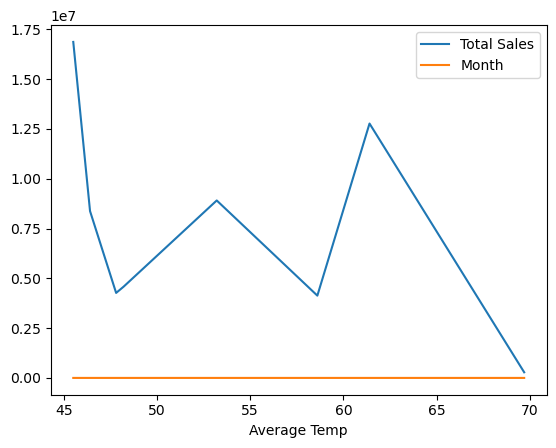

In [491]:
california_merged.plot()
plt.show()